# ***Satellite Image Classification System***

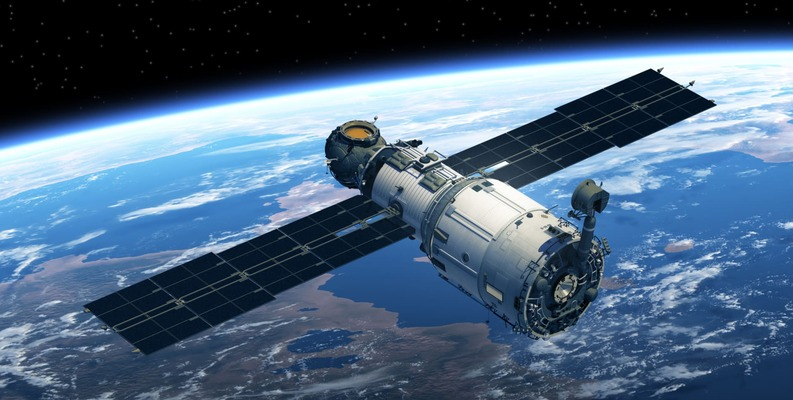

# *Import Rquired Libraries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pickle
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

# *Downloading Dataset*

In [2]:
from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [3]:
!kaggle datasets download -d mahmoudreda55/satellite-image-classification

Dataset URL: https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification
License(s): copyright-authors
 73% 16.0M/21.8M [00:00<00:00, 84.7MB/s]
100% 21.8M/21.8M [00:00<00:00, 91.2MB/s]


# *UnZipping brain-tumor-mri-scans images*

In [5]:
!unzip satellite-image-classification.zip -d satellite-images

Streaming output truncated to the last 5000 lines.
  inflating: satellite-images/data/cloudy/train_23566.jpg  
  inflating: satellite-images/data/cloudy/train_23598.jpg  
  inflating: satellite-images/data/cloudy/train_23608.jpg  
  inflating: satellite-images/data/cloudy/train_23634.jpg  
  inflating: satellite-images/data/cloudy/train_23636.jpg  
  inflating: satellite-images/data/cloudy/train_23646.jpg  
  inflating: satellite-images/data/cloudy/train_2366.jpg  
  inflating: satellite-images/data/cloudy/train_23664.jpg  
  inflating: satellite-images/data/cloudy/train_23706.jpg  
  inflating: satellite-images/data/cloudy/train_2380.jpg  
  inflating: satellite-images/data/cloudy/train_23805.jpg  
  inflating: satellite-images/data/cloudy/train_23806.jpg  
  inflating: satellite-images/data/cloudy/train_23826.jpg  
  inflating: satellite-images/data/cloudy/train_23843.jpg  
  inflating: satellite-images/data/cloudy/train_23877.jpg  
  inflating: satellite-images/data/cloudy/train_238

# Making a directory path for our Data

In [6]:
data_dir = pathlib.Path('/content/satellite-images/data')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/satellite-images/data/desert/desert(287).jpg'),
 PosixPath('/content/satellite-images/data/desert/desert(584).jpg'),
 PosixPath('/content/satellite-images/data/desert/desert(721).jpg'),
 PosixPath('/content/satellite-images/data/desert/desert(505).jpg'),
 PosixPath('/content/satellite-images/data/desert/desert(786) (1).jpg')]

# *Getting The number of Images in Dataset*

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5631


# *listing all Cloudy Images*

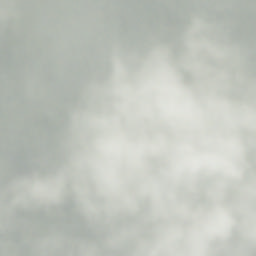

In [12]:
cloudy = list(data_dir.glob('cloudy/*'))
PIL.Image.open(str(cloudy[50]))

# *listing all desert Images*

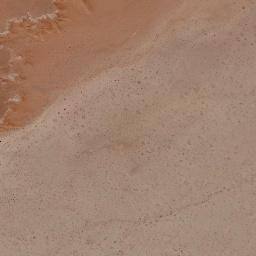

In [10]:
desert= list(data_dir.glob('desert/*'))
PIL.Image.open(str(desert[0]))

# *listing all green_area Images*

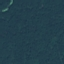

In [16]:
green_area = list(data_dir.glob('green_area/*'))
PIL.Image.open(str(green_area[50]))

# *listing all water Images*

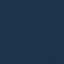

In [17]:
water= list(data_dir.glob('water/*'))
PIL.Image.open(str(water[0]))

# *Plotting The Count of each Class*

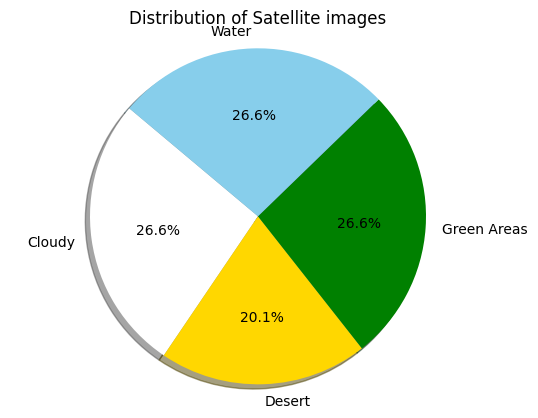

In [19]:
# Count the number of images in each class
cloudy_count = len(list(data_dir.glob('cloudy/*.jpg')))
desert_count = len(list(data_dir.glob('desert/*.jpg')))
green_area_count = len(list(data_dir.glob('green_area/*.jpg')))
water_count = len(list(data_dir.glob('water/*.jpg')))


# Create a pie chart
labels = ['Cloudy', 'Desert', 'Green Areas','Water']
sizes = [cloudy_count, desert_count,green_area_count ,water_count ]
colors = ['White', 'gold', 'green','skyblue']
explode = (0, 0, 0,0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Satellite images')
plt.show()


# *Making a dictionary for all lung Images*

In [20]:
images_dict = {
    'cloudy': list(data_dir.glob('cloudy/*')),
    'desert': list(data_dir.glob('desert/*')),
    'green_area': list(data_dir.glob('green_area/*')),
    'water': list(data_dir.glob('water/*')),
}

# *Making a dictionary for all lables*

In [22]:
labels_dict = {
    'cloudy': 0,
    'desert': 1,
    'green_area': 2,
    'water':3,

}

# *Separating The Features and Target and Resizing The Images*

In [23]:
X, y = [], []
for label, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(80,80))
        X.append(resized_img)
        y.append(labels_dict[label])

In [24]:
X = np.array(X)
y = np.array(y)

# *Splitting The Data into train and test*

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15 , random_state=42)

# *Normaliztion*

In [26]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# *Default CNN Architecture*

In [28]:
# CNN Architecture with Regularization and Dropout
num_classes = 4

model1 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),


    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),


    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),


    layers.Dense(num_classes, activation='softmax')
])

model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model1.fit(X_train_scaled, y_train, validation_split=0.15, batch_size=32, epochs=10)




Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 96s 718ms/step - accuracy: 0.5028 - loss: 2.8949 - val_accuracy: 0.6490 - val_loss: 0.8307
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 110s 468ms/step - accuracy: 0.6904 - loss: 0.7865 - val_accuracy: 0.6058 - val_loss: 0.8961
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 83s 478ms/step - accuracy: 0.7045 - loss: 0.7030 - val_accuracy: 0.6797 - val_loss: 0.6149
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 82s 479ms/step - accuracy: 0.7344 - loss: 0.6271 - val_accuracy: 0.7465 - val_loss: 0.6388
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 80s 463ms/step - accuracy: 0.7194 - loss: 0.6317 - val_accuracy: 0.7521 - val_loss: 0.5978
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 83s 467ms/step - accuracy: 0.7209 - loss: 0.5922 - val_accuracy: 0.7423 - val_loss: 0.5696
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 85s 488ms/step - accuracy: 0.7461 - loss: 0.5965 - val_accuracy: 0.7256 - val_loss: 0.5538
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 61s 474ms/step - accuracy: 0.7164 - loss: 

# *Evaluating The Model*

In [29]:
model1.evaluate(X_test_scaled,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7374 - loss: 0.5496


[0.559624969959259, 0.7313609719276428]

# *Prediction of Model*

In [30]:
predictions = model1.predict(X_test_scaled)


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step


# *plotting random images with predicted and True Class*

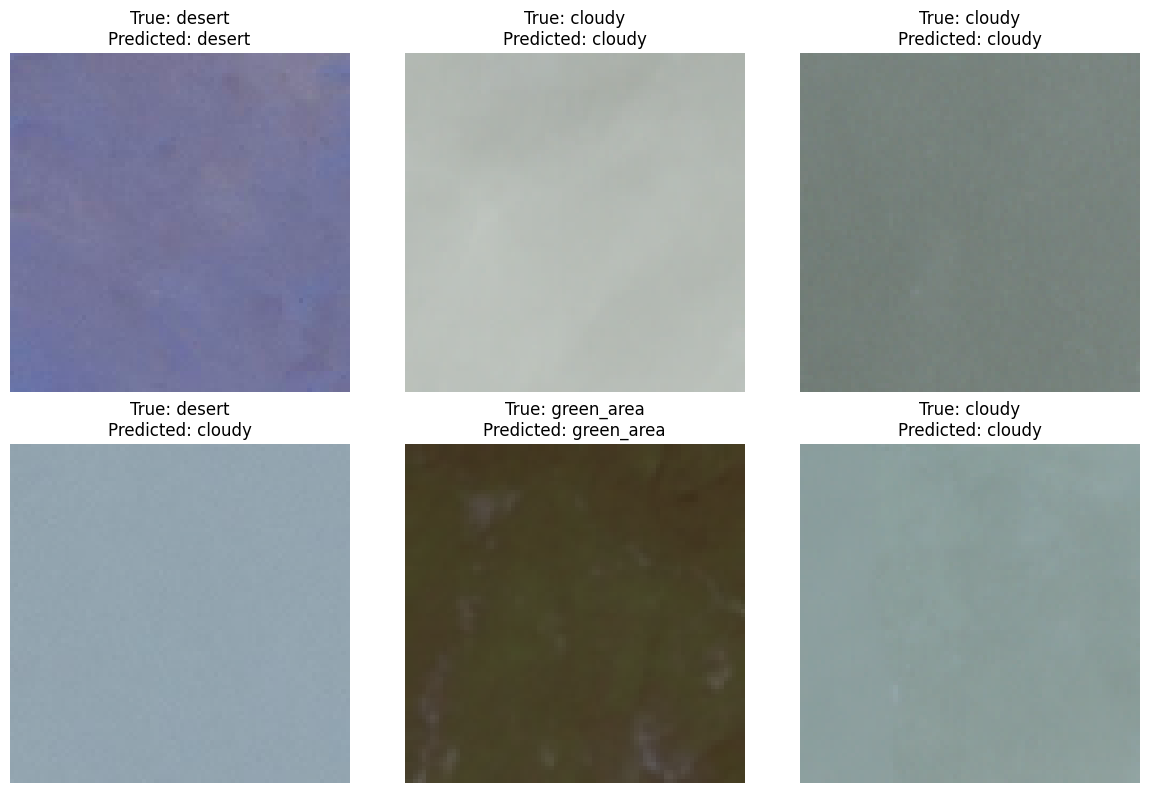

In [31]:
label_to_class = {
    0: 'cloudy',
    1: 'desert',
    2: 'green_area',
    3: 'water',
}

# Select a random subset of images to display
num_images_to_display = 6
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, index in enumerate(random_indices):
    image = X_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    axes[i].imshow(image)
    axes[i].set_title(f"True: {label_to_class[true_label]}\nPredicted: {label_to_class[predicted_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# *Plot training & validation accuracy values*

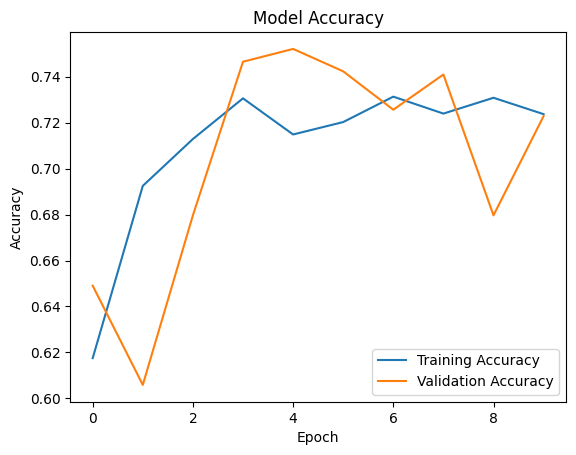

In [32]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# *Plot training & validation loss values*

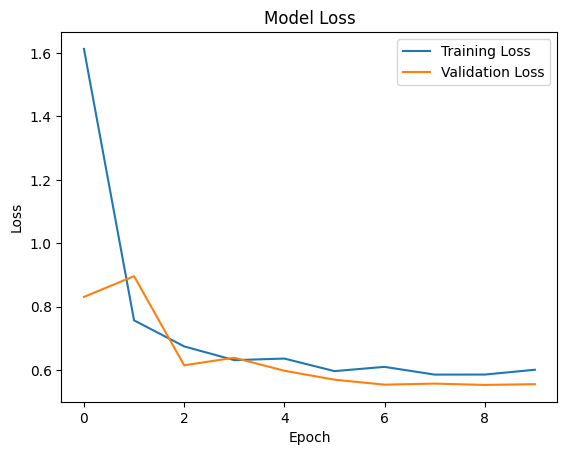

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# **Classification Report**

In [34]:
from sklearn.metrics import classification_report

y_pred = np.argmax(predictions, axis=1)
print(classification_report(y_test, y_pred, target_names=['healthy', 'brain glioma', 'brain meningioma', 'brain pituitary']))


                  precision    recall  f1-score   support

         healthy       0.82      0.94      0.87       235
    brain glioma       0.92      0.72      0.81       168
brain meningioma       0.62      0.71      0.66       223
 brain pituitary       0.63      0.53      0.58       219

        accuracy                           0.73       845
       macro avg       0.75      0.73      0.73       845
    weighted avg       0.74      0.73      0.73       845



# *Confusion Matrix*

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step


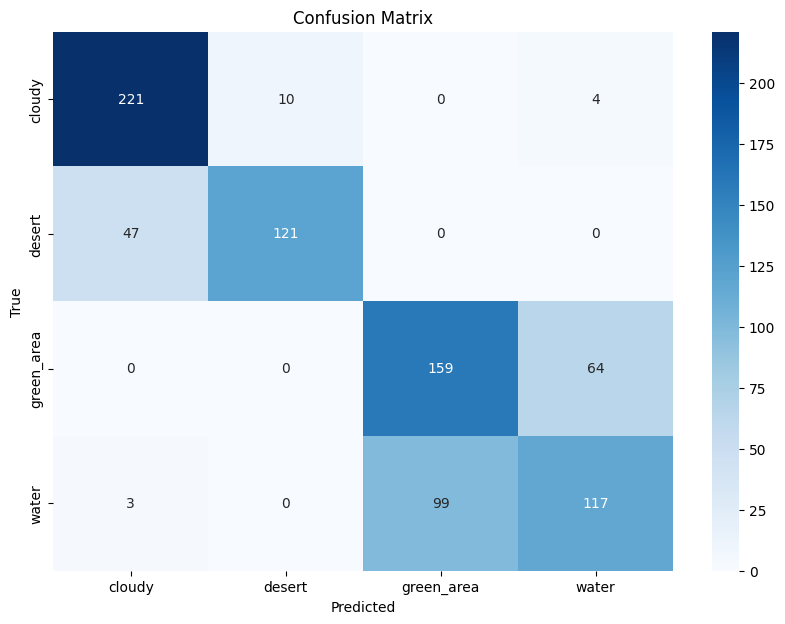

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test set
y_pred = np.argmax(model1.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['cloudy', 'desert', 'green_area','water'],
            yticklabels=['cloudy', 'desert', 'green_area','water'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Implement VGG 19**

In [36]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained VGG19 model (without the top classification layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the final model
model_vgg19 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg19.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (you might want to fine-tune some of the VGG19 layers later for better performance)
history_vgg19 = model_vgg19.fit(X_train_scaled, y_train, validation_split=0.15, epochs=10, batch_size=32)

# Evaluate the model
model_vgg19.evaluate(X_test_scaled, y_test)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.6613 - loss: 0.8798 - val_accuracy: 0.9345 - val_loss: 0.2968
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 493s 4s/step - accuracy: 0.9107 - loss: 0.2660 - val_accuracy: 0.9429 - val_loss: 0.1604
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 456s 4s/step - accuracy: 0.9408 - loss: 0.1745 - val_accuracy: 0.9596 - val_loss: 0.1310
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 483s 3s/step - accuracy: 0.9588 - loss: 0.1425 - val_accuracy: 0.9652 - val_loss: 0.0969
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 420s 3s/step - accuracy: 0.9562 - loss: 0.1295 - val_accuracy: 0.9708 - val_loss: 0.0866
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 419s 3s/step - accuracy: 0.9689 - loss: 0.0983 - val_accuracy: 0.9164 - val_loss: 0.1798
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 424s 3s/step - accuracy: 0.9640 - loss: 0.1004 - val_accuracy: 0.9526 - val_loss: 0.1304
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 438s 3

[0.09948693215847015, 0.9644970297813416]

# *Predictions*

In [37]:
predictions_vgg19 = model_vgg19.predict(X_test_scaled)

27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step


# *plotting random images with predicted and True Class*

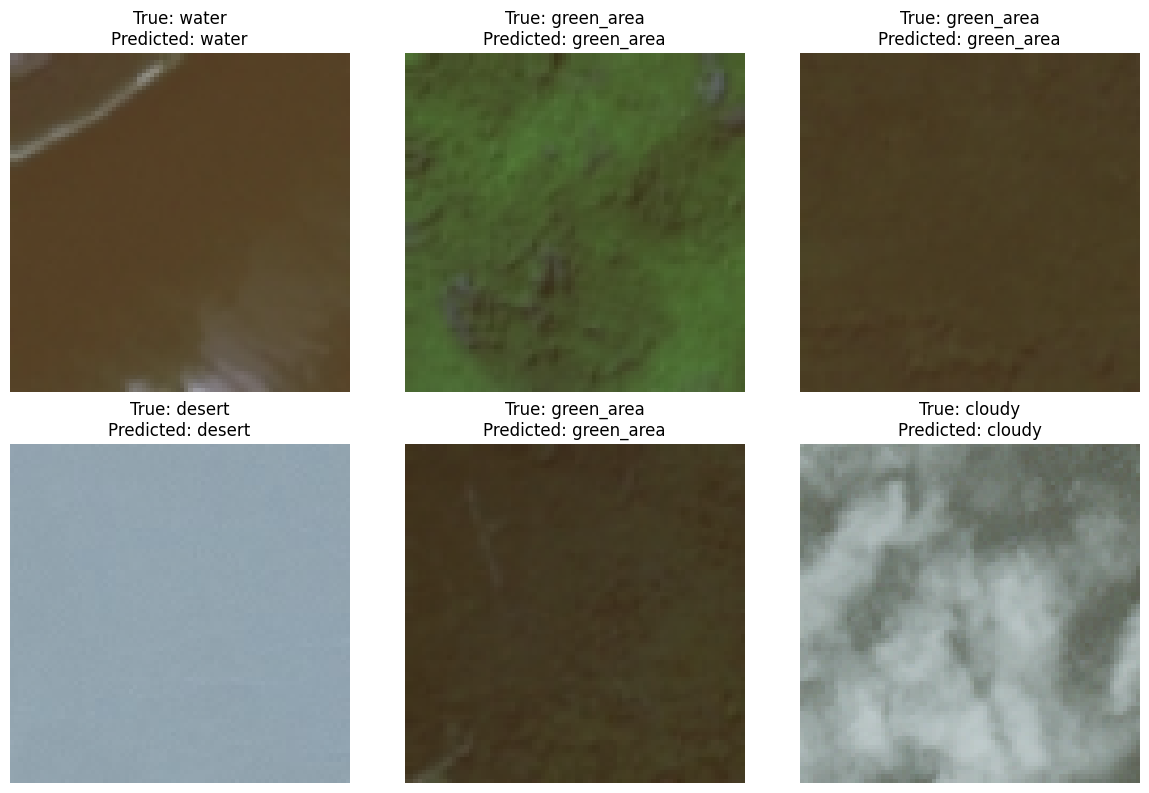

In [38]:
label_to_class = {
    0: 'cloudy',
    1: 'desert',
    2: 'green_area',
    3: 'water',
}

# Select a random subset of images to display
num_images_to_display = 6
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, index in enumerate(random_indices):
    image = X_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(predictions_vgg19[index])

    axes[i].imshow(image)
    axes[i].set_title(f"True: {label_to_class[true_label]}\nPredicted: {label_to_class[predicted_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# *Plot training & validation accuracy values*

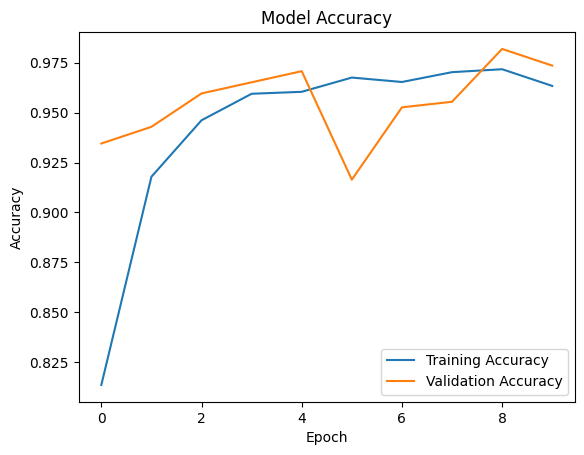

In [39]:
plt.plot(history_vgg19.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# *Plot training & validation Loss values*

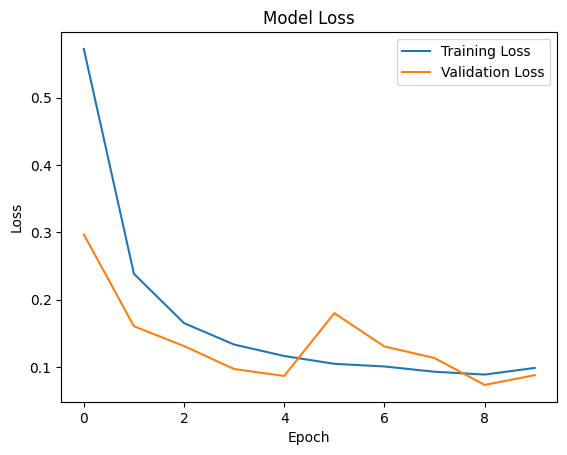

In [40]:
plt.plot(history_vgg19.history['loss'], label='Training Loss')
plt.plot(history_vgg19.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# **Classification Report**

In [42]:
from sklearn.metrics import classification_report

y_pred = np.argmax(predictions_vgg19, axis=1)
print(classification_report(y_test, y_pred, target_names=['cloudy', 'desert', 'green_area', 'water']))

              precision    recall  f1-score   support

      cloudy       0.98      0.92      0.95       235
      desert       0.91      1.00      0.95       168
  green_area       0.99      0.98      0.98       223
       water       0.97      0.97      0.97       219

    accuracy                           0.96       845
   macro avg       0.96      0.97      0.96       845
weighted avg       0.97      0.96      0.96       845



# *Confusion Matrix*

27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step


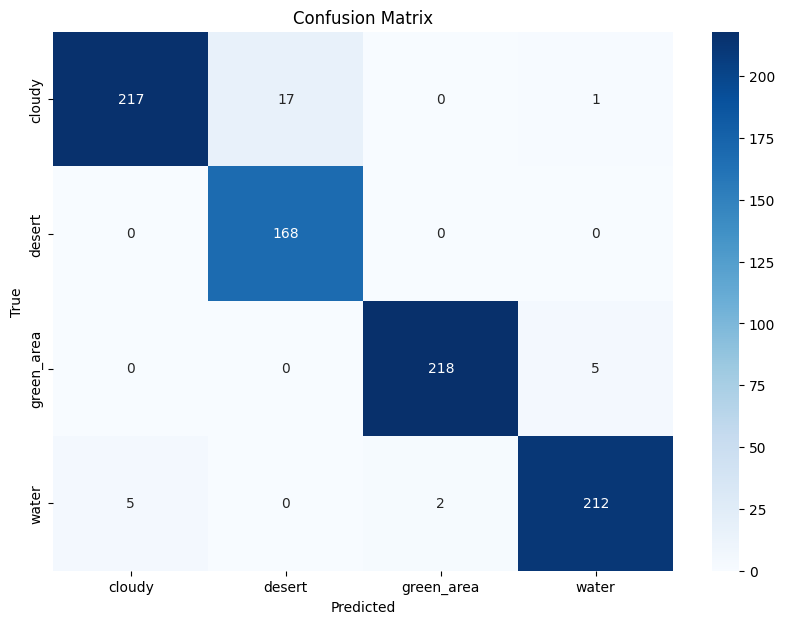

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test set
y_pred = np.argmax(model_vgg19.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['cloudy', 'desert', 'green_area','water'],
            yticklabels=['cloudy', 'desert', 'green_area','water'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# *Implement Xception*

In [44]:

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import Xception

# Load the pre-trained Xception model (without the top classification layers)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## *Train the model*

In [45]:
# Create the final model
model_xception = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_xception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_xception = model_xception.fit(X_train_scaled, y_train, validation_split=0.15, epochs=10, batch_size=32)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7581 - loss: 0.8556 - val_accuracy: 0.9234 - val_loss: 0.2961
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9305 - loss: 0.2711 - val_accuracy: 0.9443 - val_loss: 0.5235
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 127s 995ms/step - accuracy: 0.9529 - loss: 0.1720 - val_accuracy: 0.9526 - val_loss: 0.4246
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 141s 988ms/step - accuracy: 0.9653 - loss: 0.1276 - val_accuracy: 0.9401 - val_loss: 0.5945
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9695 - loss: 0.1522 - val_accuracy: 0.9457 - val_loss: 0.3264
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9753 - loss: 0.0886 - val_accuracy: 0.9485 - val_loss: 0.4166
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9829 - loss: 0.0737 - val_accuracy: 0.9513 - val_loss: 0.2901
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 139s 982ms/step - accuracy: 0.9802 - loss: 0.1060 -

# *Evaluate the model*

In [46]:
# Evaluate the model
model_xception.evaluate(X_test_scaled, y_test)

# Predictions
predictions_xception = model_xception.predict(X_test_scaled)

27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 780ms/step - accuracy: 0.9353 - loss: 0.3511
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 871ms/step


# plotting random images with predicted and True Class

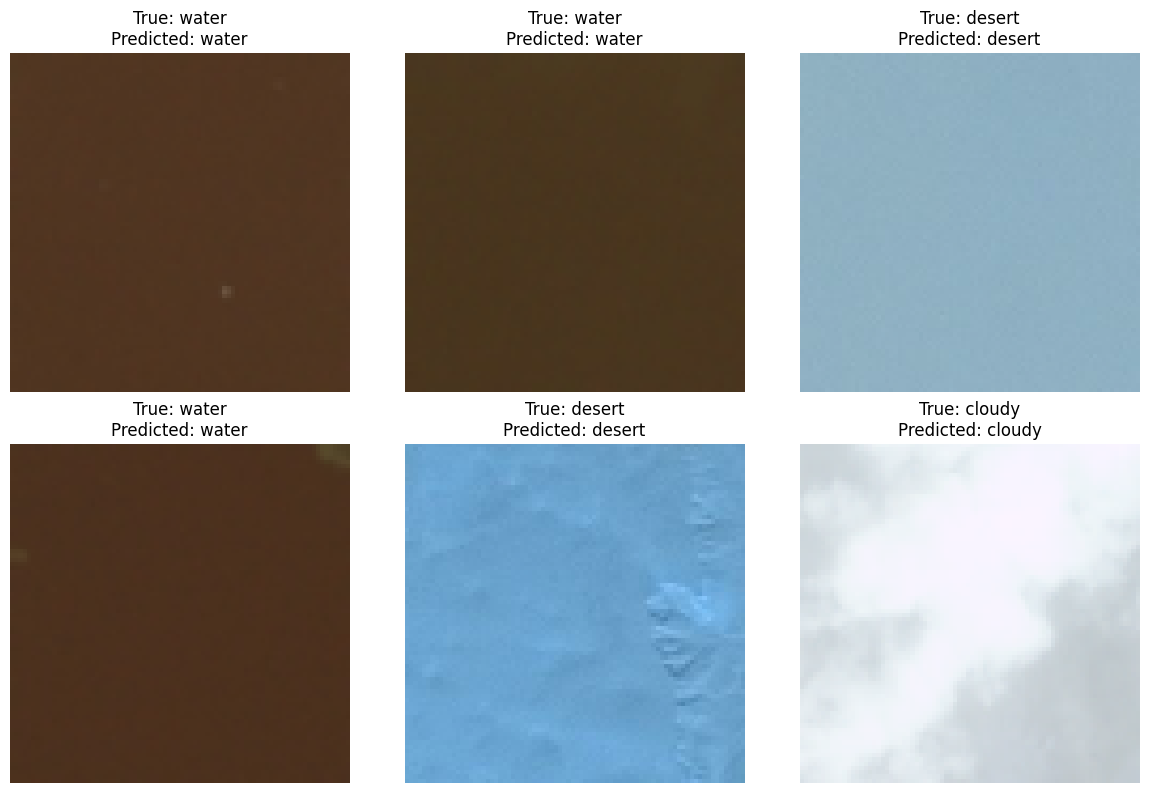

In [48]:

label_to_class = {
    0: 'cloudy',
    1: 'desert',
    2: 'green_area',
    3: 'water',
}

# Select a random subset of images to display
num_images_to_display = 6
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, index in enumerate(random_indices):
    image = X_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(predictions_xception[index])

    axes[i].imshow(image)
    axes[i].set_title(f"True: {label_to_class[true_label]}\nPredicted: {label_to_class[predicted_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Plot training & validation accuracy values

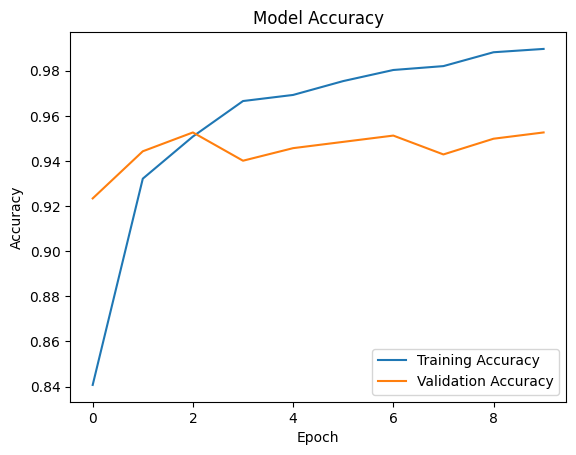

In [49]:

plt.plot(history_xception.history['accuracy'], label='Training Accuracy')
plt.plot(history_xception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Plot training & validation Loss values

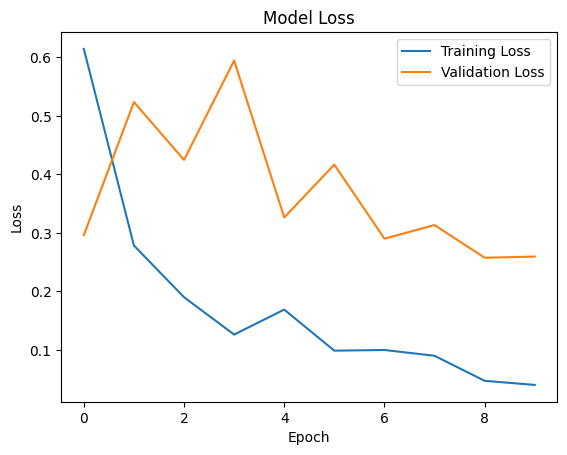

In [50]:

plt.plot(history_xception.history['loss'], label='Training Loss')
plt.plot(history_xception.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


# Classification Report

In [51]:
y_pred = np.argmax(predictions_xception, axis=1)
print(classification_report(y_test, y_pred, target_names=['cloudy', 'desert', 'green_area', 'water']))


              precision    recall  f1-score   support

      cloudy       0.95      0.94      0.95       235
      desert       0.95      0.94      0.94       168
  green_area       0.95      0.96      0.95       223
       water       0.92      0.92      0.92       219

    accuracy                           0.94       845
   macro avg       0.94      0.94      0.94       845
weighted avg       0.94      0.94      0.94       845



# Confusion Matrix

27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 807ms/step


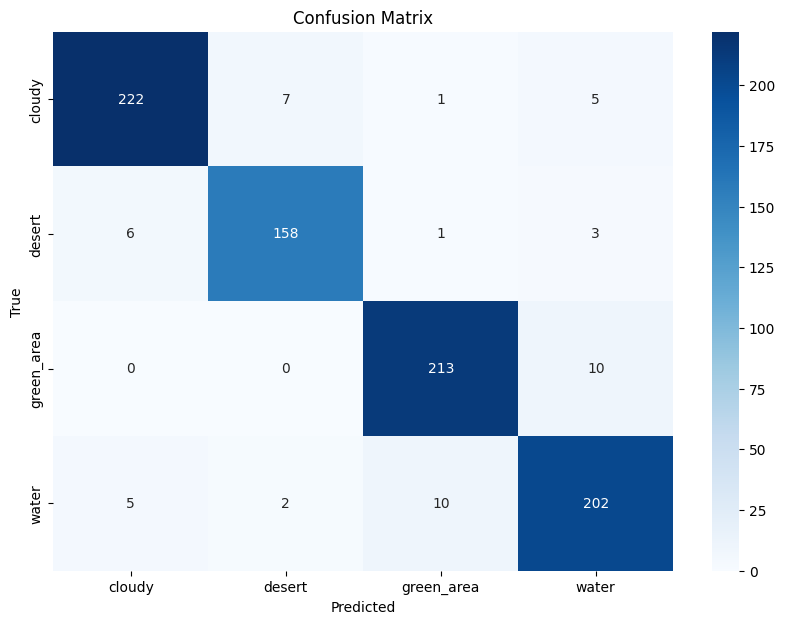

In [52]:
# Generate predictions for the test set
y_pred = np.argmax(model_xception.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['cloudy', 'desert', 'green_area','water'],
            yticklabels=['cloudy', 'desert', 'green_area','water'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Saving The Models**

In [56]:
model_xception.save('satx_model.keras')
model_vgg19.save('vgg_model.keras')